In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("C:\\Users\\shuvam\\Desktop\\python projects\\MACHINE LEARNING MODEL\\House_Price.csv")
df.head()

,Flat_Price,EMI_Starts,BHK,css-11nfaq3,Unnamed: 4,HOUSE_TYPE,Unnamed: 6,Unnamed: 7,Purpose,Location,Area_Type,Total_Sq.ft,Price_per_sq.ft,Owner_name,Owner_type
0,₹8.5 Cr,₹4.22 Lacs,6 BHK,6.0,BHK,Independent House,Independent,House,for sale in,"Ballygunge, Kolkata",Build Up Area,4200 sq.ft,₹20.24 K/sq.ft,Abhijit Chakraborty,Housing Expert
1,₹45.0 L,₹23.83 K,3 BHK,3.0,BHK,Independent House,Independent,House,for sale in,"Barrackpore, Kolkata",Build Up Area,1400 sq.ft,₹3.21 K/sq.ft,Virtual Reality,Housing Expert
2,₹1.35 Cr,₹67.02 K,3 BHK,3.0,BHK,Independent House,Independent,House,for sale in,"Santoshpur, Kolkata",Build Up Area,2500 sq.ft,₹5.40 K/sq.ft,AveNew Properties,Housing Expert
3,₹60.0 L,₹31.77 K,5 BHK,5.0,BHK,Independent House,Independent,House,for sale in,"Sarsuna, Kolkata",Build Up Area,1100 sq.ft,₹5.45 K/sq.ft,Ganapati Real Estate,Housing Expert
4,₹52.0 L,₹27.54 K,4 BHK,4.0,BHK,Independent House,Independent,House,for sale in,"Madhyamgram, Kolkata",Build Up Area,900 sq.ft,₹5.78 K/sq.ft,Third Eye Consulting,Housing Expert


In [3]:
df.columns

Index(['Flat_Price', 'EMI_Starts', 'BHK', 'css-11nfaq3', 'Unnamed: 4',
       'HOUSE_TYPE', 'Unnamed: 6', 'Unnamed: 7', 'Purpose', 'Location',
       'Area_Type', 'Total_Sq.ft', 'Price_per_sq.ft', 'Owner_name',
       'Owner_type'],
      dtype='object')

In [4]:
df['bhk'] = df['css-11nfaq3']
df=df.drop(['BHK','css-11nfaq3','Unnamed: 6','Unnamed: 7','Owner_name','Owner_type'],axis=1)
df.shape

(3968, 10)

In [5]:
df.head()

,Flat_Price,EMI_Starts,Unnamed: 4,HOUSE_TYPE,Purpose,Location,Area_Type,Total_Sq.ft,Price_per_sq.ft,bhk
0,₹8.5 Cr,₹4.22 Lacs,BHK,Independent House,for sale in,"Ballygunge, Kolkata",Build Up Area,4200 sq.ft,₹20.24 K/sq.ft,6.0
1,₹45.0 L,₹23.83 K,BHK,Independent House,for sale in,"Barrackpore, Kolkata",Build Up Area,1400 sq.ft,₹3.21 K/sq.ft,3.0
2,₹1.35 Cr,₹67.02 K,BHK,Independent House,for sale in,"Santoshpur, Kolkata",Build Up Area,2500 sq.ft,₹5.40 K/sq.ft,3.0
3,₹60.0 L,₹31.77 K,BHK,Independent House,for sale in,"Sarsuna, Kolkata",Build Up Area,1100 sq.ft,₹5.45 K/sq.ft,5.0
4,₹52.0 L,₹27.54 K,BHK,Independent House,for sale in,"Madhyamgram, Kolkata",Build Up Area,900 sq.ft,₹5.78 K/sq.ft,4.0


In [6]:
df.isna().sum()

Flat_Price         0
EMI_Starts         0
Unnamed: 4         2
HOUSE_TYPE         0
Purpose            2
Location           2
Area_Type          0
Total_Sq.ft        0
Price_per_sq.ft    0
bhk                2
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().any()

Flat_Price         False
EMI_Starts         False
Unnamed: 4         False
HOUSE_TYPE         False
Purpose            False
Location           False
Area_Type          False
Total_Sq.ft        False
Price_per_sq.ft    False
bhk                False
dtype: bool

In [9]:
df['Type'] =df['Unnamed: 4']
df.head()

,Flat_Price,EMI_Starts,Unnamed: 4,HOUSE_TYPE,Purpose,Location,Area_Type,Total_Sq.ft,Price_per_sq.ft,bhk,Type
0,₹8.5 Cr,₹4.22 Lacs,BHK,Independent House,for sale in,"Ballygunge, Kolkata",Build Up Area,4200 sq.ft,₹20.24 K/sq.ft,6.0,BHK
1,₹45.0 L,₹23.83 K,BHK,Independent House,for sale in,"Barrackpore, Kolkata",Build Up Area,1400 sq.ft,₹3.21 K/sq.ft,3.0,BHK
2,₹1.35 Cr,₹67.02 K,BHK,Independent House,for sale in,"Santoshpur, Kolkata",Build Up Area,2500 sq.ft,₹5.40 K/sq.ft,3.0,BHK
3,₹60.0 L,₹31.77 K,BHK,Independent House,for sale in,"Sarsuna, Kolkata",Build Up Area,1100 sq.ft,₹5.45 K/sq.ft,5.0,BHK
4,₹52.0 L,₹27.54 K,BHK,Independent House,for sale in,"Madhyamgram, Kolkata",Build Up Area,900 sq.ft,₹5.78 K/sq.ft,4.0,BHK


In [10]:
df=df.drop(['Unnamed: 4'],axis=1)

In [11]:
df['Area_Type'].unique  

<bound method Series.unique of 0       Build Up Area
1       Build Up Area
2       Build Up Area
3       Build Up Area
4       Build Up Area
            ...      
3963    Build Up Area
3964    Build Up Area
3965    Build Up Area
3966    Build Up Area
3967    Build Up Area
Name: Area_Type, Length: 3966, dtype: object>

In [12]:
df['Type'].unique  

<bound method Series.unique of 0       BHK
1       BHK
2       BHK
3       BHK
4       BHK
       ... 
3963    BHK
3964    BHK
3965    BHK
3966    BHK
3967    BHK
Name: Type, Length: 3966, dtype: object>

In [13]:
df['Purpose'].unique  

<bound method Series.unique of 0       for sale in
1       for sale in
2       for sale in
3       for sale in
4       for sale in
           ...     
3963    for sale in
3964    for sale in
3965    for sale in
3966    for sale in
3967    for sale in
Name: Purpose, Length: 3966, dtype: object>

In [14]:
df=df.drop(['Purpose','Area_Type','Type'],axis=1)
df.head()

,Flat_Price,EMI_Starts,HOUSE_TYPE,Location,Total_Sq.ft,Price_per_sq.ft,bhk
0,₹8.5 Cr,₹4.22 Lacs,Independent House,"Ballygunge, Kolkata",4200 sq.ft,₹20.24 K/sq.ft,6.0
1,₹45.0 L,₹23.83 K,Independent House,"Barrackpore, Kolkata",1400 sq.ft,₹3.21 K/sq.ft,3.0
2,₹1.35 Cr,₹67.02 K,Independent House,"Santoshpur, Kolkata",2500 sq.ft,₹5.40 K/sq.ft,3.0
3,₹60.0 L,₹31.77 K,Independent House,"Sarsuna, Kolkata",1100 sq.ft,₹5.45 K/sq.ft,5.0
4,₹52.0 L,₹27.54 K,Independent House,"Madhyamgram, Kolkata",900 sq.ft,₹5.78 K/sq.ft,4.0


In [15]:
df['HOUSE_TYPE'].unique

<bound method Series.unique of 0       Independent House
1       Independent House
2       Independent House
3       Independent House
4       Independent House
              ...        
3963    Independent House
3964    Independent House
3965    Independent House
3966    Independent House
3967    Independent House
Name: HOUSE_TYPE, Length: 3966, dtype: object>

In [16]:
df=df.drop(['HOUSE_TYPE'],axis=1)

In [17]:
df1=df.copy()

# Feature Engineering

In [18]:
df1.bhk = df1.bhk.apply(lambda x: int(x))
df1

,Flat_Price,EMI_Starts,Location,Total_Sq.ft,Price_per_sq.ft,bhk
0,₹8.5 Cr,₹4.22 Lacs,"Ballygunge, Kolkata",4200 sq.ft,₹20.24 K/sq.ft,6
1,₹45.0 L,₹23.83 K,"Barrackpore, Kolkata",1400 sq.ft,₹3.21 K/sq.ft,3
2,₹1.35 Cr,₹67.02 K,"Santoshpur, Kolkata",2500 sq.ft,₹5.40 K/sq.ft,3
3,₹60.0 L,₹31.77 K,"Sarsuna, Kolkata",1100 sq.ft,₹5.45 K/sq.ft,5
4,₹52.0 L,₹27.54 K,"Madhyamgram, Kolkata",900 sq.ft,₹5.78 K/sq.ft,4
...,...,...,...,...,...,...
3963,₹13.0 L,₹6.88 K,"Picnic Garden, Kolkata",1500 sq.ft,₹866/sq.ft,2
3964,₹1.5 Cr,₹74.47 K,"Rajpur Sonarpur, Kolkata",2560 sq.ft,₹5.86 K/sq.ft,8
3965,₹50.0 L,₹26.48 K,"Amtala, Kolkata",1900 sq.ft,₹2.63 K/sq.ft,5
3966,₹1.1 Cr,₹54.61 K,"Tollygunge, Kolkata",2600 sq.ft,₹4.23 K/sq.ft,5


In [19]:
df1['Price_per_sq.ft'] = df1['Price_per_sq.ft'].apply(lambda x: x.rstrip('/sq.ft'))
df1['Price_per_sq.ft'] = df1['Price_per_sq.ft'].apply(lambda x: x.lstrip('₹'))
df1

,Flat_Price,EMI_Starts,Location,Total_Sq.ft,Price_per_sq.ft,bhk
0,₹8.5 Cr,₹4.22 Lacs,"Ballygunge, Kolkata",4200 sq.ft,20.24 K,6
1,₹45.0 L,₹23.83 K,"Barrackpore, Kolkata",1400 sq.ft,3.21 K,3
2,₹1.35 Cr,₹67.02 K,"Santoshpur, Kolkata",2500 sq.ft,5.40 K,3
3,₹60.0 L,₹31.77 K,"Sarsuna, Kolkata",1100 sq.ft,5.45 K,5
4,₹52.0 L,₹27.54 K,"Madhyamgram, Kolkata",900 sq.ft,5.78 K,4
...,...,...,...,...,...,...
3963,₹13.0 L,₹6.88 K,"Picnic Garden, Kolkata",1500 sq.ft,866,2
3964,₹1.5 Cr,₹74.47 K,"Rajpur Sonarpur, Kolkata",2560 sq.ft,5.86 K,8
3965,₹50.0 L,₹26.48 K,"Amtala, Kolkata",1900 sq.ft,2.63 K,5
3966,₹1.1 Cr,₹54.61 K,"Tollygunge, Kolkata",2600 sq.ft,4.23 K,5


In [20]:
df1['Price_per_sq.ft'].unique

<bound method Series.unique of 0       20.24 K
1        3.21 K
2        5.40 K
3        5.45 K
4        5.78 K
         ...   
3963        866
3964     5.86 K
3965     2.63 K
3966     4.23 K
3967     3.16 K
Name: Price_per_sq.ft, Length: 3966, dtype: object>

In [21]:
df1['Total_Sq.ft'] = df1['Total_Sq.ft'].apply(lambda x : x.split()[0])
df1

,Flat_Price,EMI_Starts,Location,Total_Sq.ft,Price_per_sq.ft,bhk
0,₹8.5 Cr,₹4.22 Lacs,"Ballygunge, Kolkata",4200,20.24 K,6
1,₹45.0 L,₹23.83 K,"Barrackpore, Kolkata",1400,3.21 K,3
2,₹1.35 Cr,₹67.02 K,"Santoshpur, Kolkata",2500,5.40 K,3
3,₹60.0 L,₹31.77 K,"Sarsuna, Kolkata",1100,5.45 K,5
4,₹52.0 L,₹27.54 K,"Madhyamgram, Kolkata",900,5.78 K,4
...,...,...,...,...,...,...
3963,₹13.0 L,₹6.88 K,"Picnic Garden, Kolkata",1500,866,2
3964,₹1.5 Cr,₹74.47 K,"Rajpur Sonarpur, Kolkata",2560,5.86 K,8
3965,₹50.0 L,₹26.48 K,"Amtala, Kolkata",1900,2.63 K,5
3966,₹1.1 Cr,₹54.61 K,"Tollygunge, Kolkata",2600,4.23 K,5


In [22]:
df2=df1.copy()

In [23]:
df2['region'] = df2['Location'].apply(lambda x: x.split(',')[0])
df2.head()

,Flat_Price,EMI_Starts,Location,Total_Sq.ft,Price_per_sq.ft,bhk,region
0,₹8.5 Cr,₹4.22 Lacs,"Ballygunge, Kolkata",4200,20.24 K,6,Ballygunge
1,₹45.0 L,₹23.83 K,"Barrackpore, Kolkata",1400,3.21 K,3,Barrackpore
2,₹1.35 Cr,₹67.02 K,"Santoshpur, Kolkata",2500,5.40 K,3,Santoshpur
3,₹60.0 L,₹31.77 K,"Sarsuna, Kolkata",1100,5.45 K,5,Sarsuna
4,₹52.0 L,₹27.54 K,"Madhyamgram, Kolkata",900,5.78 K,4,Madhyamgram


In [24]:
df2=df2.drop(['Location'],axis=1)

In [25]:
df2.Flat_Price.unique()

array(['₹8.5 Cr', '₹45.0 L', '₹1.35 Cr', '₹60.0 L', '₹52.0 L', '₹32.0 L',
       '₹69.3 L', '₹40.0 L', '₹95.0 L', '₹3.0 Cr', '₹80.0 L', '₹48.0 L',
       '₹1.3 Cr', '₹45.0 Cr', '₹55.0 L', '₹1.4 Cr', '₹67.0 L', '₹99.0 L',
       '₹31.99 L', '₹75.0 L', '₹5.25 Cr', '₹4.0 Cr', '₹1.1 Cr', '₹24.5 L',
       '₹70.0 L', '₹50.0 L', '₹6.25 Cr', '₹57.0 L', '₹93.0 L', '₹90.0 L',
       '₹87.0 L', '₹68.0 L', '₹1.0 Cr', '₹3.3 Cr', '₹4.7 Cr', '₹1.5 Cr',
       '₹22.0 Cr', '₹5.9 Cr', '₹58.0 L', '₹22.5 L', '₹65.0 L', '₹1.7 Cr',
       '₹14.0 L', '₹1.9 Cr', '₹36.0 L', '₹2.2 Cr', '₹85.0 L', '₹13.0 Cr',
       '₹1.75 Cr', '₹1.12 Cr', '₹2.5 Cr', '₹33.0 L', '₹2.9 Cr', '₹3.5 Cr',
       '₹2.15 Cr', '₹72.0 L', '₹46.0 L', '₹26.0 L', '₹29.0 L', '₹11.5 Cr',
       '₹4.6 Cr', '₹1.15 Cr', '₹37.0 L', '₹34.5 L', '₹35.0 L', '₹1.05 Cr',
       '₹14.0 Cr', '₹2.7 Cr', '₹2.3 Cr', '₹38.0 L', '₹1.2 Cr', '₹66.0 L',
       '₹19.0 L', '₹12.5 L', '₹17.0 L', '₹1.26 Cr', '₹1.85 Cr', '₹1.8 Cr',
       '₹37.55 L', '₹78.0 L', '₹56.

In [26]:
df2['Flat_Price'] = df2['Flat_Price'].apply(lambda x: x.lstrip('₹'))
df2['EMI_Starts'] = df2['EMI_Starts'].apply(lambda x: x.lstrip('₹'))

In [27]:
df2

,Flat_Price,EMI_Starts,Total_Sq.ft,Price_per_sq.ft,bhk,region
0,8.5 Cr,4.22 Lacs,4200,20.24 K,6,Ballygunge
1,45.0 L,23.83 K,1400,3.21 K,3,Barrackpore
2,1.35 Cr,67.02 K,2500,5.40 K,3,Santoshpur
3,60.0 L,31.77 K,1100,5.45 K,5,Sarsuna
4,52.0 L,27.54 K,900,5.78 K,4,Madhyamgram
...,...,...,...,...,...,...
3963,13.0 L,6.88 K,1500,866,2,Picnic Garden
3964,1.5 Cr,74.47 K,2560,5.86 K,8,Rajpur Sonarpur
3965,50.0 L,26.48 K,1900,2.63 K,5,Amtala
3966,1.1 Cr,54.61 K,2600,4.23 K,5,Tollygunge


In [28]:
def convert_to_num(row_values):
    splitted_value=row_values.split(' ')
    amt=float(splitted_value[0])
    if len(splitted_value)==2:
        unit=splitted_value[1]
        if unit=='K':
            return 1000*float(amt)
        elif unit=='L' or unit=='Lacs':
            return 100000*float(amt)
        elif unit=='Cr':
            return 10000000*float(amt)
    else :
        return amt

In [29]:
df2['Flat_Price'] = df2['Flat_Price'].apply(convert_to_num)
df2['EMI_Starts'] = df2['EMI_Starts'].apply(convert_to_num)
df2['Price_per_sq.ft'] = df2['Price_per_sq.ft'].apply(convert_to_num)
df2['Total_Sq.ft'] = df2['Total_Sq.ft'] .apply(convert_to_num)

In [30]:
df2.describe()

,Flat_Price,EMI_Starts,Total_Sq.ft,Price_per_sq.ft,bhk
count,3.966000e+03,3.966000e+03,3966.000000,3966.000000,3966.000000
mean,1.811498e+07,9.061383e+04,2649.569339,6182.939486,4.740292
std,3.664861e+07,1.817164e+05,2375.171913,5728.975679,2.437646
min,1.350000e+05,7.140000e+02,150.000000,156.000000,1.000000
25%,5.000000e+06,2.648000e+04,1250.000000,3040.000000,3.000000
50%,8.500000e+06,4.220000e+04,2000.000000,4520.000000,4.000000
75%,1.750000e+07,8.688000e+04,3000.000000,7330.000000,6.000000
max,6.000000e+08,2.979000e+06,32000.000000,93750.000000,10.000000


In [31]:
df3=df2.copy()

In [32]:
df4=df3[(df3['Total_Sq.ft']/df.bhk>300)]

In [33]:
df4.shape

(3383, 6)

In [93]:
df4=df4[df4['Price_per_sq.ft']>3500]

In [116]:
df4.shape

(2167, 6)

In [118]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('region'):
        m=np.mean(subdf['Price_per_sq.ft'])
        sd=np.std(subdf['Price_per_sq.ft'])
        reduced_df=subdf[(subdf['Price_per_sq.ft']>(m-2*sd)) & (subdf['Price_per_sq.ft']<=(m+2*sd))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df5=remove_pps_outliers(df4)
df5.shape

(1993, 6)

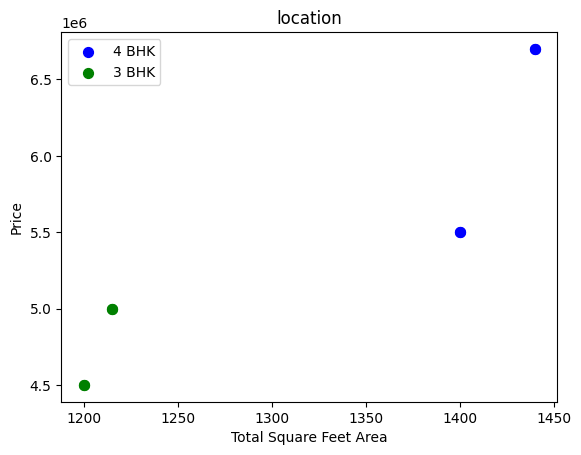

In [119]:
def plot_scatter_chart(df,region):
    bhk4=df[(df.region==region) & (df.bhk==4)]
    bhk3=df[(df.region==region) & (df.bhk==3)]
    plt.scatter(bhk4['Total_Sq.ft'],bhk4.Flat_Price,color='blue',label='4 BHK',s=50)
    plt.scatter(bhk3['Total_Sq.ft'],bhk3.Flat_Price,color='green',label='3 BHK',s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title('location')
    plt.legend()

plot_scatter_chart(df5,'Barrackpore')
    

In [120]:
df5

,Flat_Price,EMI_Starts,Total_Sq.ft,Price_per_sq.ft,bhk,region
0,4000000.0,21180.0,1000.0,4000.0,2,Agarpara
1,4000000.0,21180.0,1000.0,4000.0,2,Agarpara
2,8000000.0,39720.0,1500.0,5330.0,4,Agarpara
3,8000000.0,39720.0,1500.0,5330.0,4,Agarpara
4,2700000.0,14300.0,364.0,7420.0,1,Agarpara
...,...,...,...,...,...,...
1988,11000000.0,54610.0,1800.0,6110.0,2,Topsia
1989,37000000.0,184000.0,3000.0,12330.0,5,VIP Nagar
1990,37000000.0,184000.0,3000.0,12330.0,5,VIP Nagar
1991,17000000.0,84400.0,1440.0,11800.0,3,VIP Nagar


Text(0, 0.5, 'count')

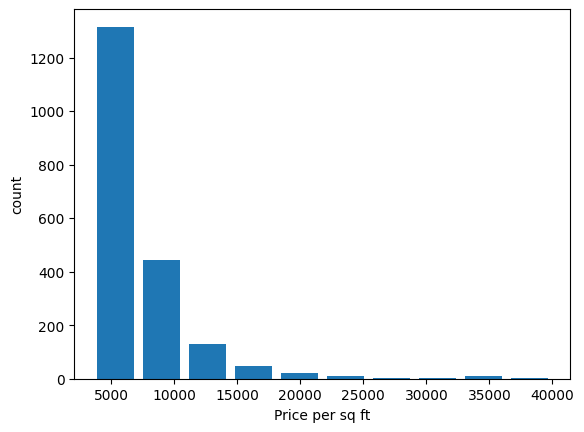

In [121]:
plt.hist(df5['Price_per_sq.ft'],rwidth=0.8)
plt.xlabel('Price per sq ft')
plt.ylabel('count')

In [122]:
df6=df5[df5['Price_per_sq.ft']<=40000]

In [123]:
df6

,Flat_Price,EMI_Starts,Total_Sq.ft,Price_per_sq.ft,bhk,region
0,4000000.0,21180.0,1000.0,4000.0,2,Agarpara
1,4000000.0,21180.0,1000.0,4000.0,2,Agarpara
2,8000000.0,39720.0,1500.0,5330.0,4,Agarpara
3,8000000.0,39720.0,1500.0,5330.0,4,Agarpara
4,2700000.0,14300.0,364.0,7420.0,1,Agarpara
...,...,...,...,...,...,...
1988,11000000.0,54610.0,1800.0,6110.0,2,Topsia
1989,37000000.0,184000.0,3000.0,12330.0,5,VIP Nagar
1990,37000000.0,184000.0,3000.0,12330.0,5,VIP Nagar
1991,17000000.0,84400.0,1440.0,11800.0,3,VIP Nagar


In [124]:
dummies = pd.get_dummies(df6.region,dtype='int')
dummies

,Agarpara,Airport,Alipore,Amtala,Ariadaha,Baghajatin,Baghbazar,Baguiati,Baguihati,Baishnabghata Patuli Township,...,South Dum Dum,Tagore Park,Tala,Taltala,Tangra,Thakurpukur,Tiljala,Tollygunge,Topsia,VIP Nagar
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [125]:
df7=pd.concat([df6,dummies],axis=1)
df7.head()

,Flat_Price,EMI_Starts,Total_Sq.ft,Price_per_sq.ft,bhk,region,Agarpara,Airport,Alipore,Amtala,...,South Dum Dum,Tagore Park,Tala,Taltala,Tangra,Thakurpukur,Tiljala,Tollygunge,Topsia,VIP Nagar
0,4000000.0,21180.0,1000.0,4000.0,2,Agarpara,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4000000.0,21180.0,1000.0,4000.0,2,Agarpara,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8000000.0,39720.0,1500.0,5330.0,4,Agarpara,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8000000.0,39720.0,1500.0,5330.0,4,Agarpara,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2700000.0,14300.0,364.0,7420.0,1,Agarpara,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
df7.drop(['region','Price_per_sq.ft','EMI_Starts'],axis=1,inplace=True)

# Build a model

In [127]:
reg = LinearRegression()

In [128]:
x=df7.drop('Flat_Price',axis=1)
y=df7.Flat_Price
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [129]:
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),x,y,cv=5)

array([-1.01532740e+18, -1.61504436e+17, -1.12916725e+16, -1.50255528e+18,
       -3.16156323e+18])

In [130]:
reg.fit(x_train,y_train)
reg.score(x_test,y_test)

0.673125580383724

# Find best model using GridSearchCV

In [131]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
             'model': algo_name,
              'best_score': gs.best_score_,
              'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [132]:
find_best_model_using_gridsearchcv(x,y)

C:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.565e+17, tolerance: 3.293e+14
  model = cd_fast.enet_coordinate_descent(
C:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.140e+17, tolerance: 2.968e+14
  model = cd_fast.enet_coordinate_descent(
C:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.674e+17, tolerance: 3.292e+14
  model = cd_fast.enet_

,model,best_score,best_params
0,linear_regression,-5.506515e+13,{}
1,lasso,6.673249e-01,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,8.621335e-01,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [133]:
model = DecisionTreeRegressor(criterion='friedman_mse',splitter='random')
model

DecisionTreeRegressor(criterion='friedman_mse', splitter='random')

In [134]:
model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', splitter='random')

In [135]:
model.score(x_test,y_test)

0.848349629523395

In [136]:
def predict_price(region,sqft,bhk):
    loc_index=np.where(x.columns==region)[0][0]
    
    z=np.zeros(len(x.columns))
    z[0]=sqft
    z[1]=bhk
    if loc_index >=0:
        z[loc_index]=1
    return model.predict([z])[0]

In [140]:
predict_price('Barrackpore',1000,3)

C:\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


5600000.0

In [141]:
import pickle
with open('kolkata_house_price_model','wb') as f:
    pickle.dump(model,f)

In [148]:
import json
columns={
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))